In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.DataFrame({
    "customer_id": range(1, 21),
    "tenure": np.random.randint(1, 60, 20),
    "monthly_spend": np.random.randint(20, 200, 20),
    "support_calls": np.random.randint(0, 10, 20),
    "contract_type": np.random.choice([0, 1], 20),
    "churn": np.random.choice([0, 1], 20)
})


In [3]:
features = ["tenure", "monthly_spend", "support_calls", "contract_type"]
X = data[features]
y = data["churn"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
predictions = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, predictions))


Model Accuracy: 0.25


In [7]:
data["ltv"] = data["monthly_spend"] * data["tenure"]

In [8]:
high_value = data[data["ltv"] > data["ltv"].quantile(0.75)]
high_risk = high_value[model.predict(high_value[features]) == 1]

In [10]:
print("High-value customers at risk of churning:")
print(high_risk[["customer_id", "ltv", "monthly_spend", "tenure"]])

High-value customers at risk of churning:
    customer_id   ltv  monthly_spend  tenure
2             3  8918            182      49
9            10  5423            187      29
10           11  7258            191      38
12           13  9120            190      48


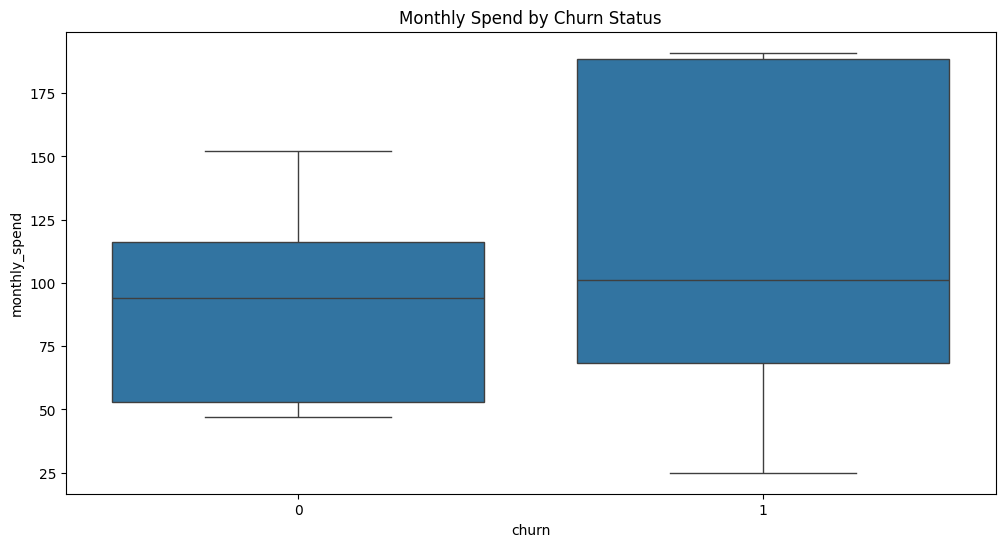

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["churn"], y=data["monthly_spend"])
plt.title("Monthly Spend by Churn Status")
plt.show()

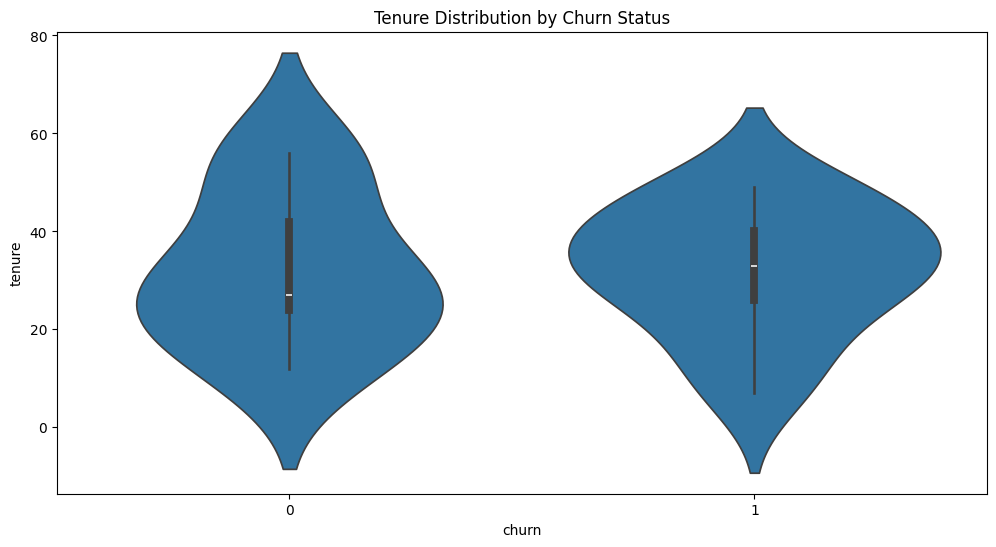

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=data["churn"], y=data["tenure"])
plt.title("Tenure Distribution by Churn Status")
plt.show()

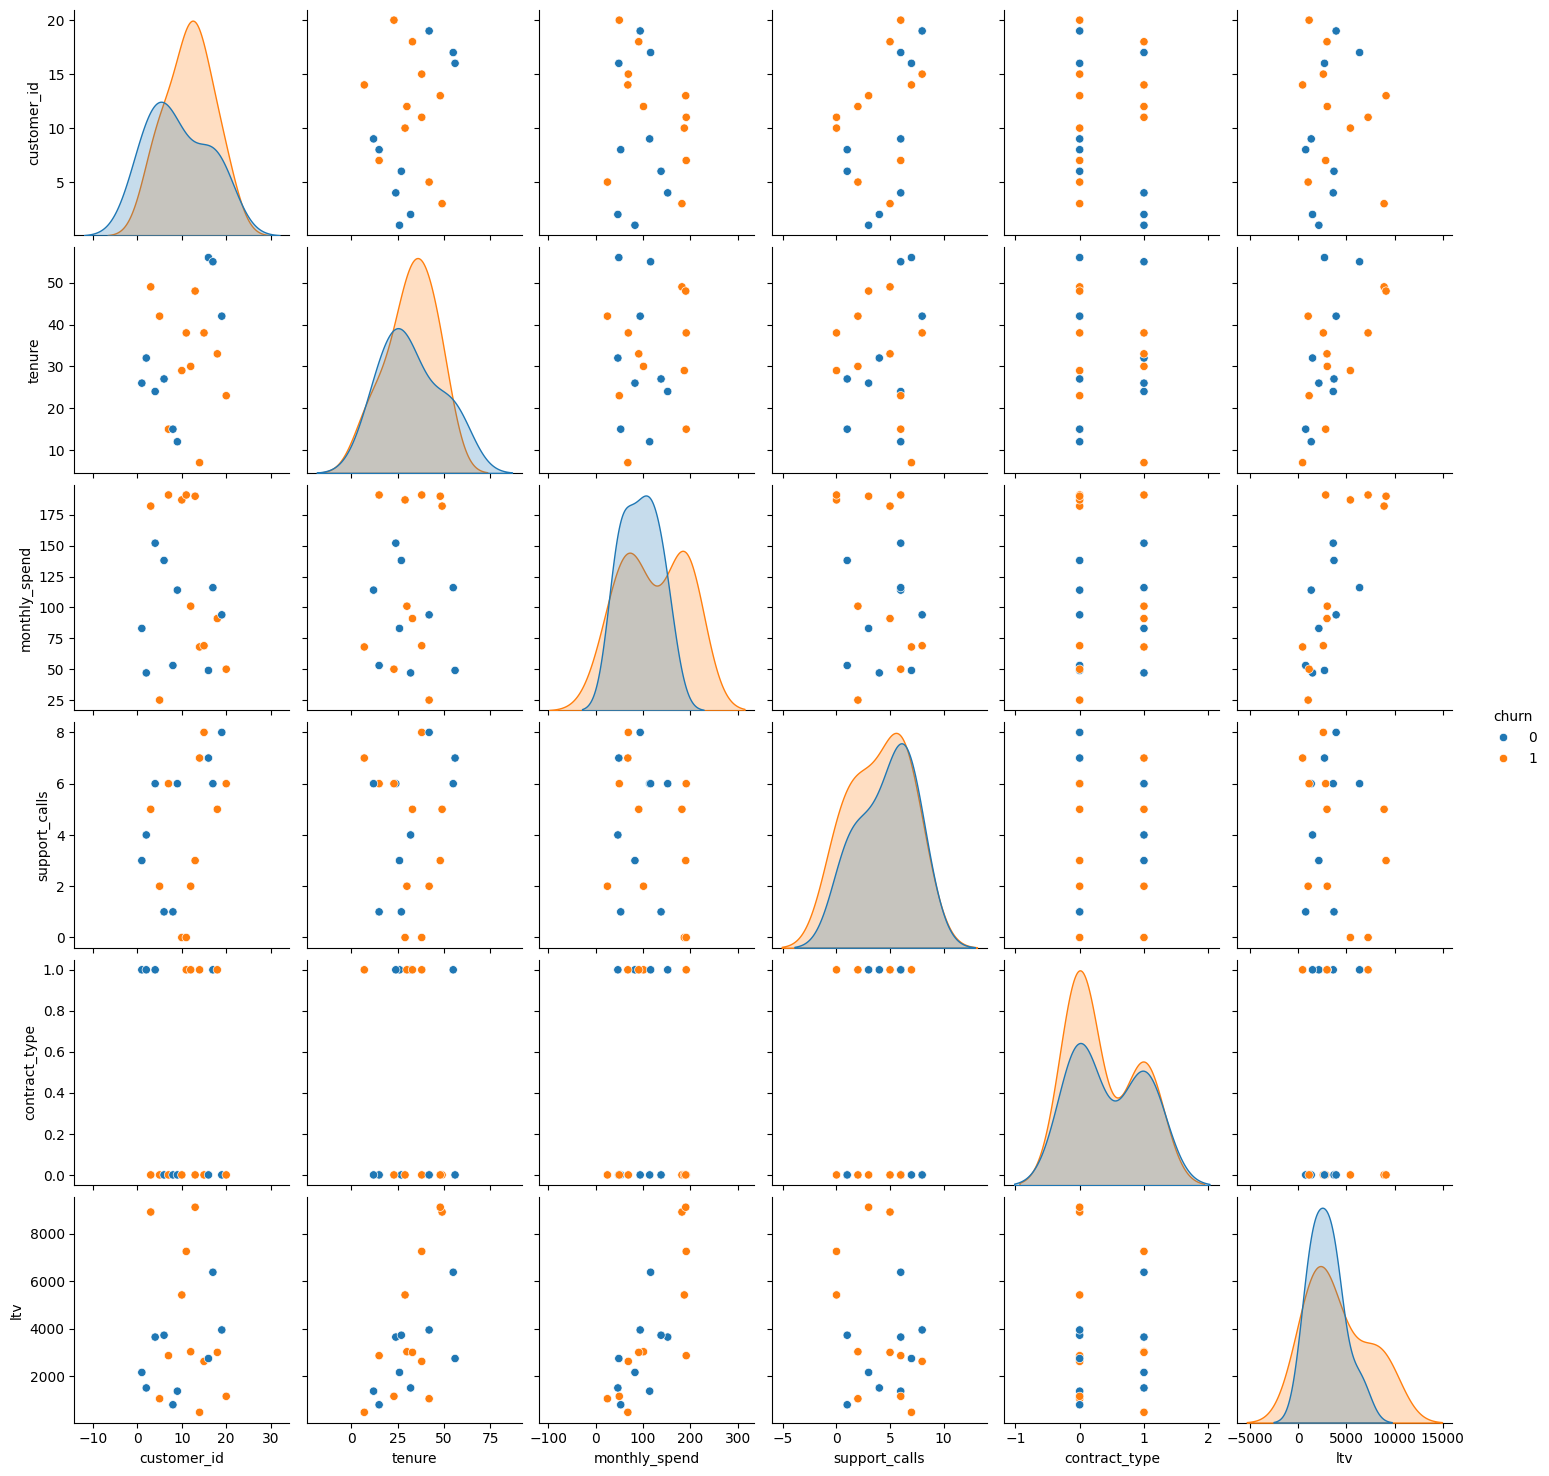

In [13]:
sns.pairplot(data, hue="churn", diag_kind="kde")
plt.show()
